## Accessing the fitbit API 

In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os

In [2]:
os.getcwd()

'/Users/jamestwose/Coding/jms_tracker/DS_stuff'

In [3]:
tmp = os.getcwd()
os.chdir(tmp.split("Coding")[0] + "Coding/jmspack")
from dotenv import load_dotenv
from jmspack.internal_utils import (postgresql_data_extraction,
                                    postgresql_table_names_list,
                                   create_postgresql_table_based_on_df,
                                    add_data_to_postgresql_table,
                                   delete_postgresql_table)

In [4]:
def scale_df(x):
    return pd.DataFrame(MinMaxScaler().fit_transform(x), columns=x.columns, index=x.index)

In [5]:
df = pd.read_csv("../jms_tracker/DS_stuff/MyFitbitData/JamesTwose/Sleep/sleep_score.csv")

In [6]:
df=df.astype({"timestamp": "datetime64[ns]"})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sleep_log_entry_id     61 non-null     int64         
 1   timestamp              61 non-null     datetime64[ns]
 2   overall_score          61 non-null     int64         
 3   composition_score      61 non-null     int64         
 4   revitalization_score   61 non-null     int64         
 5   duration_score         61 non-null     int64         
 6   deep_sleep_in_minutes  61 non-null     int64         
 7   resting_heart_rate     61 non-null     int64         
 8   restlessness           61 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 4.4 KB


In [8]:
df.head()

,sleep_log_entry_id,timestamp,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,31329941146,2021-03-15 07:25:30,73,17,20,36,58,62,0.095406
1,31311276181,2021-03-14 07:31:30,70,15,17,38,74,63,0.119711
2,31298350770,2021-03-13 08:05:30,80,18,22,40,107,63,0.083865
3,31285389428,2021-03-12 07:12:30,68,16,19,33,54,64,0.105660
4,31270477702,2021-03-11 07:17:30,71,15,18,38,88,64,0.074074


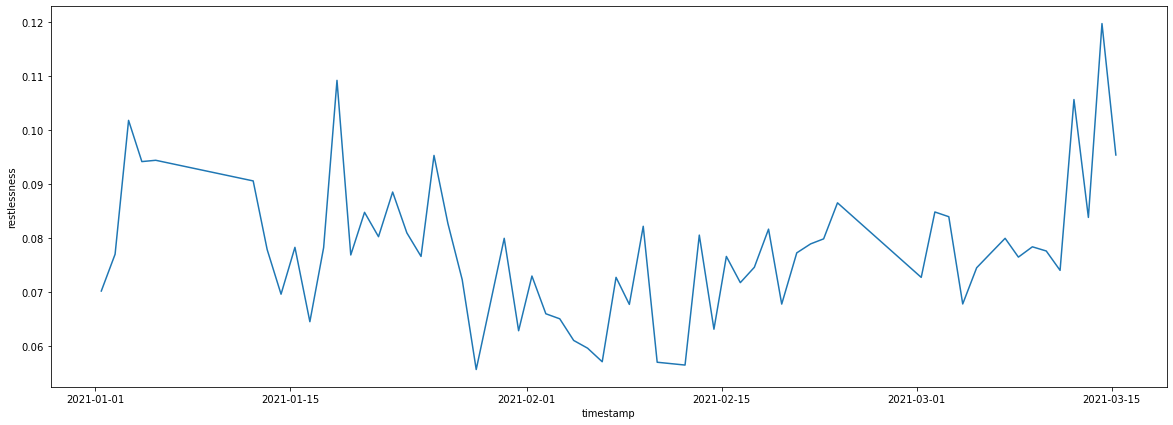

In [9]:
_ = plt.figure(figsize=(20,7))
_ = sns.lineplot(x="timestamp",
            y="restlessness",
            data=df)

In [10]:
scale_cols = ['overall_score',
 'composition_score',
 'revitalization_score',
 'duration_score',
 'deep_sleep_in_minutes',
 'resting_heart_rate',
 'restlessness']

In [11]:
df[scale_cols] = scale_df(df[scale_cols])

In [12]:
df_melt = df.melt(id_vars=["sleep_log_entry_id", "timestamp"])

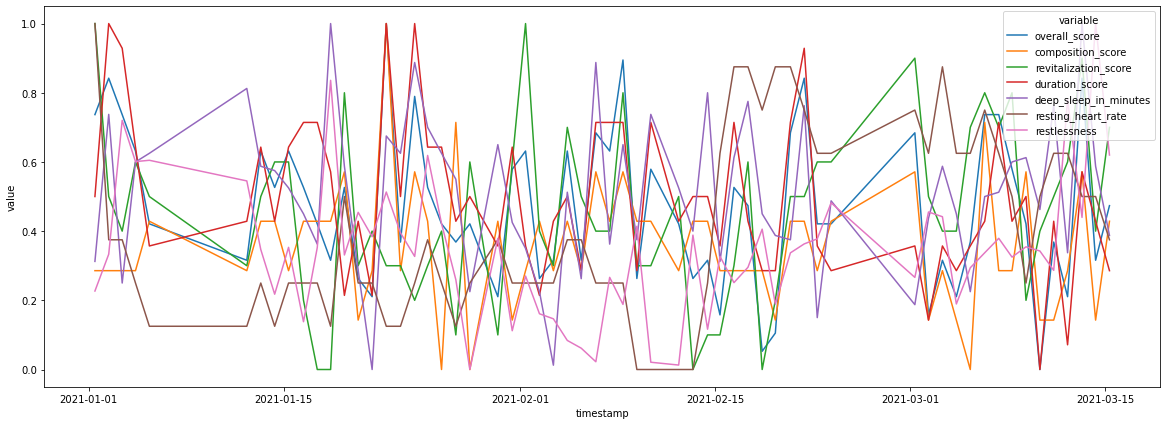

In [13]:
_ = plt.figure(figsize=(20,7))
_ = sns.lineplot(x="timestamp",
            y="value",
            hue="variable",
            data=df_melt)